In [1]:
name="CART"

In [2]:
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# plt.style.use('ggplot')

Using TensorFlow backend.


In [3]:
def create_dataset(data):
    X_train, Y_train= list(), list()
    final_choices = [x[-1]-1 for x in data]
    features = [x[:-1] for x in data]
    return features, final_choices

In [4]:
def create_dataset_test(data):
    X_test, Y_test= list(), list()
    final_choices = [x[-1]-1 for x in data]
    features = [x[:-1] for x in data]
    return features, final_choices

In [5]:
def normalise_outcomes(data):
    maxi = max([max(x) for x in data])
    mini = min([min(x) for x in data])
    for i in range(len(data)):
        for j in range(1,len(data[i]),2):
            data[i][j] -= mini
            data[i][j] /= (maxi-mini)

In [6]:
def parse_dataset(name, flag):
    infile = open(name, 'r')
    lines = infile.readlines()
    data = []
    for line in lines:
        data.append([float(x) for x in line.split(',')])
    normalise_outcomes(data)
    if(flag):
        return create_dataset(data)
    else:
        return create_dataset_test(data)

In [7]:
X_train, y_train = parse_dataset('../data/estimation_without_padding.csv', 1)
X_test, y_test = parse_dataset('../data/competition_without_padding.csv', 0)

In [8]:
X_train[0]
X_test[0]

[1.0,
 0.09444444444444447,
 2.0,
 0.0685185185185185,
 1.0,
 0.09444444444444447,
 1.0,
 0.09444444444444447,
 1.0,
 0.09444444444444447,
 1.0,
 0.09444444444444447,
 1.0,
 0.09444444444444447,
 1.0,
 0.09444444444444447]

In [9]:
maxlen = max(max([len(x) for x in X_train]), max([len(x) for x in X_test]))
X_train = pad_sequences(X_train, padding='post', value=0, dtype=float, maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', value=0, dtype=float, maxlen=maxlen)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
res = [] #stores results to plot

In [12]:
# for neighbors in range(1,3,2):
neighbors=1
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(neighbors, accuracy_score(y_test, y_pred))
res.append((neighbors, accuracy_score(y_test, y_pred)))
DecisionTreeClassifier()

1 0.5509181969949917


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

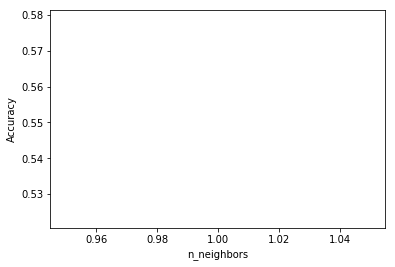

In [13]:
xs = [x[0] for x in res]
ys = [x[1] for x in res]
plt.plot(xs, ys)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.savefig('results/'+name)